In [ ]:
a = []
while(1):
    a.append(‘1’)

# import neccesary file (model1 -cnn)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


# explore data

In [ ]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print (np.max(x_train))
print (np.min(x_train))

255
0


In [ ]:
img_rows, img_cols = 32, 32

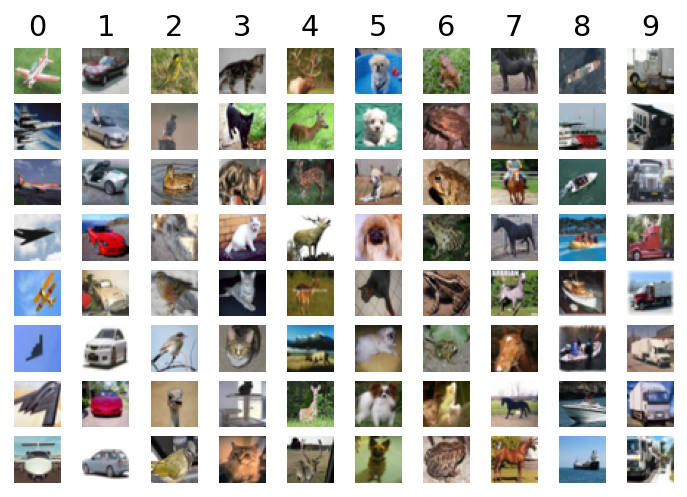

In [ ]:
examples_per_class = 8 # number of examples you want to see from each class
num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for cls, cls_name in enumerate(num_classes):
  idxs = np.where(cls == y_train)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, len(num_classes), i * len(num_classes) + cls + 1)
    plt.imshow(x_train[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name)

#preprocessing for cnn

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

In [ ]:
num_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Comment out the two lines below to remove the normalization
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#model1 cnn

In [ ]:


model = tf.keras.Sequential()

# first set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(64, kernel_size=(5,5),
                        strides=(1,1),
                        padding='same', # adds sufficient padding to the input so that the output has same dimension as input
                        input_shape=input_shape,
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros'))

# Exercise : Complete the 3 activation functions
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5),
                        padding='valid'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(tf.keras.layers.Conv2D(120, kernel_size=(5,5),
                 padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84))

# Classifier
model.add(tf.keras.layers.Dense(num_classes))

# Exercise : Complete the activation function of the classifier
model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        25616     
                                                                 
 activation_1 (Activation)   (None, 12, 12, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
batch_size = 128
num_classes = 10
epochs = 20
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, # number of samples to be used for each gradient update
                      epochs=epochs, # number of iterations over the entire x_train data#
                      validation_split = 0.1, #validation_data=(x_test, y_test), # on which to evaluate loss and model metrics at the end of each epoch
                     )

Epoch 1/20


KeyboardInterrupt: ignored

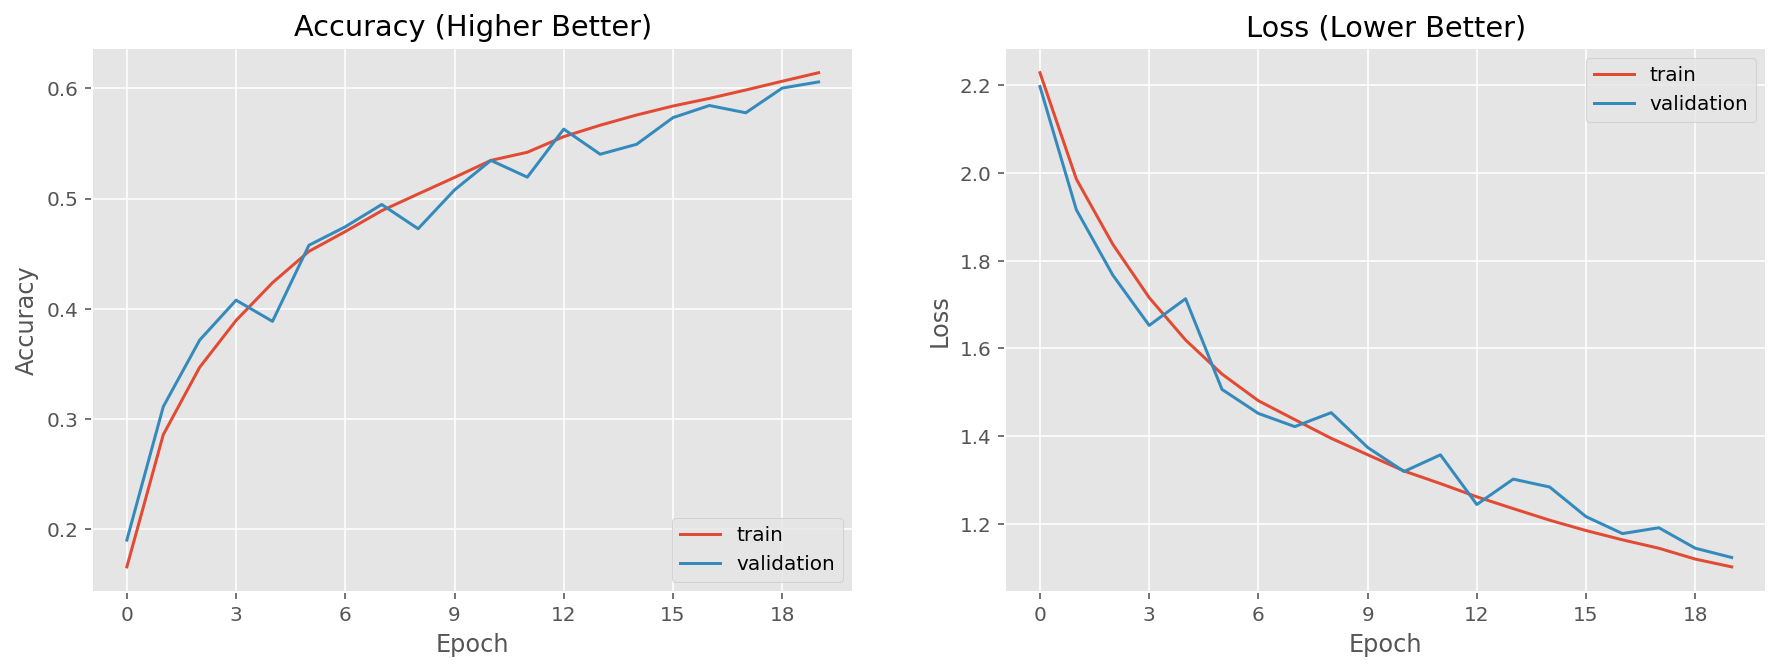

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1397006511688232
Test accuracy: 0.5975000262260437


# tuning 1 lenet

In [ ]:
model = tf.keras.Sequential()

# first set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(64, kernel_size=(5,5),
                        strides=(1,1),
                        padding='same', # adds sufficient padding to the input so that the output has same dimension as input
                        input_shape=input_shape,
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros'))

# Exercise : Complete the 3 activation functions
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))

# second set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3),
                        padding='valid'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(tf.keras.layers.Conv2D(120, kernel_size=(3,3),
                 padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84))

# Classifier
model.add(tf.keras.layers.Dense(num_classes))

# Exercise : Complete the activation function of the classifier
model.add(tf.keras.layers.Activation('softmax'))

# evaluate data

In [ ]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
batch_size = 128
num_classes = 10
epochs = 20

model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, # number of samples to be used for each gradient update
                      epochs=epochs, # number of iterations over the entire x_train data#
                      validation_split = 0.1, #validation_data=(x_test, y_test), # on which to evaluate loss and model metrics at the end of each epoch
                     )

Epoch 1/20
352/352 [==============================] - 279s 790ms/step - loss: 2.1071 - accuracy: 0.2267 - val_loss: 1.9201 - val_accuracy: 0.3168
Epoch 2/20
352/352 [==============================] - 275s 781ms/step - loss: 1.8047 - accuracy: 0.3596 - val_loss: 1.7284 - val_accuracy: 0.3730
Epoch 3/20
352/352 [==============================] - 272s 774ms/step - loss: 1.6297 - accuracy: 0.4184 - val_loss: 1.5876 - val_accuracy: 0.4436
Epoch 4/20
352/352 [==============================] - 274s 778ms/step - loss: 1.5340 - accuracy: 0.4557 - val_loss: 1.4557 - val_accuracy: 0.4850
Epoch 5/20
352/352 [==============================] - 273s 777ms/step - loss: 1.4655 - accuracy: 0.4782 - val_loss: 1.4474 - val_accuracy: 0.4886
Epoch 6/20
352/352 [==============================] - 274s 778ms/step - loss: 1.3878 - accuracy: 0.5070 - val_loss: 1.3529 - val_accuracy: 0.5318
Epoch 7/20
352/352 [==============================] - 273s 775ms/step - loss: 1.3298 - accuracy: 0.5296 - val_loss: 1.2693 -

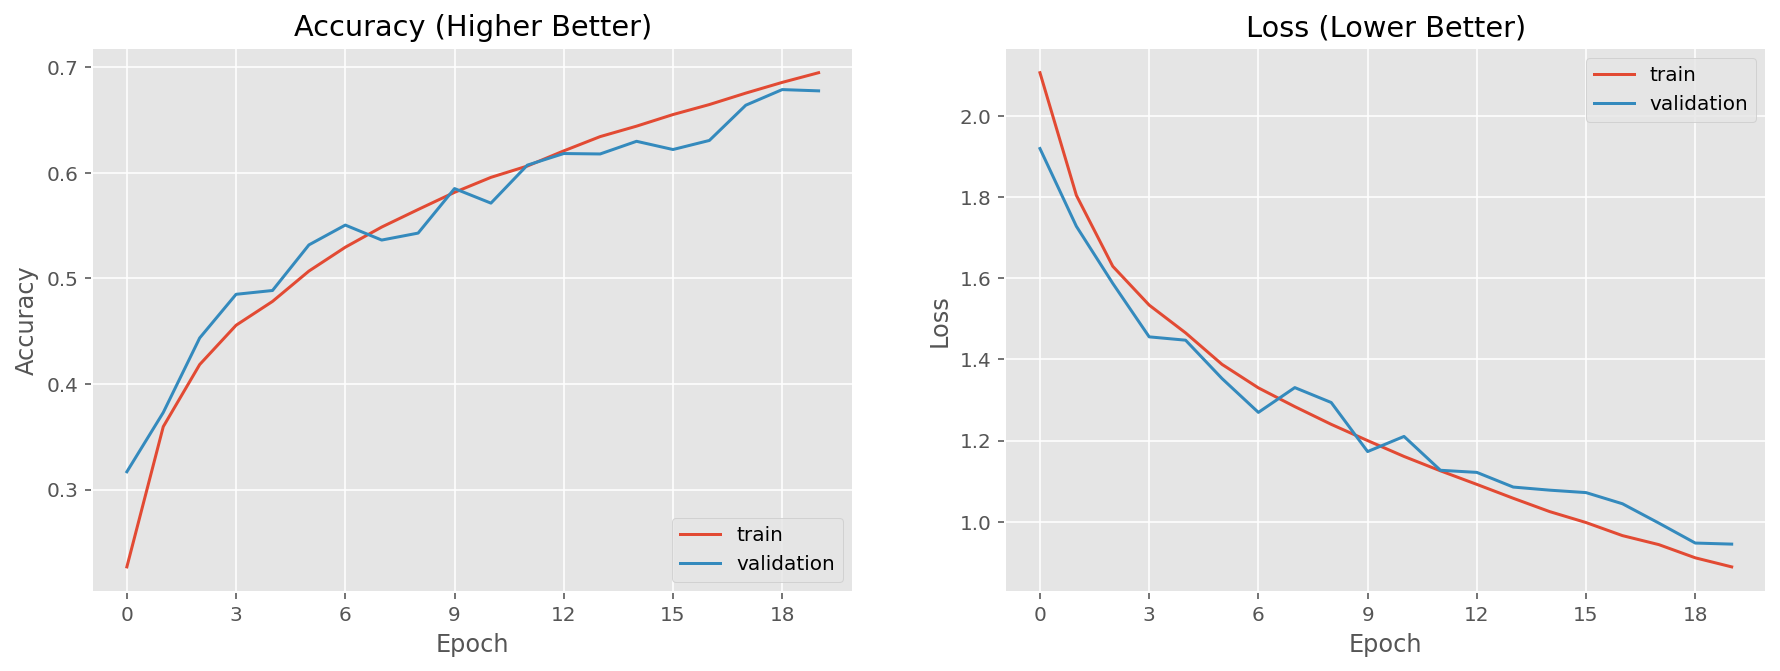

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9898660182952881
Test accuracy: 0.6600000262260437


Green labels are right predictions, red are wrong predictions. The one in the paranthesis is the ground truth(real),       the first label is the prediction by the CNN


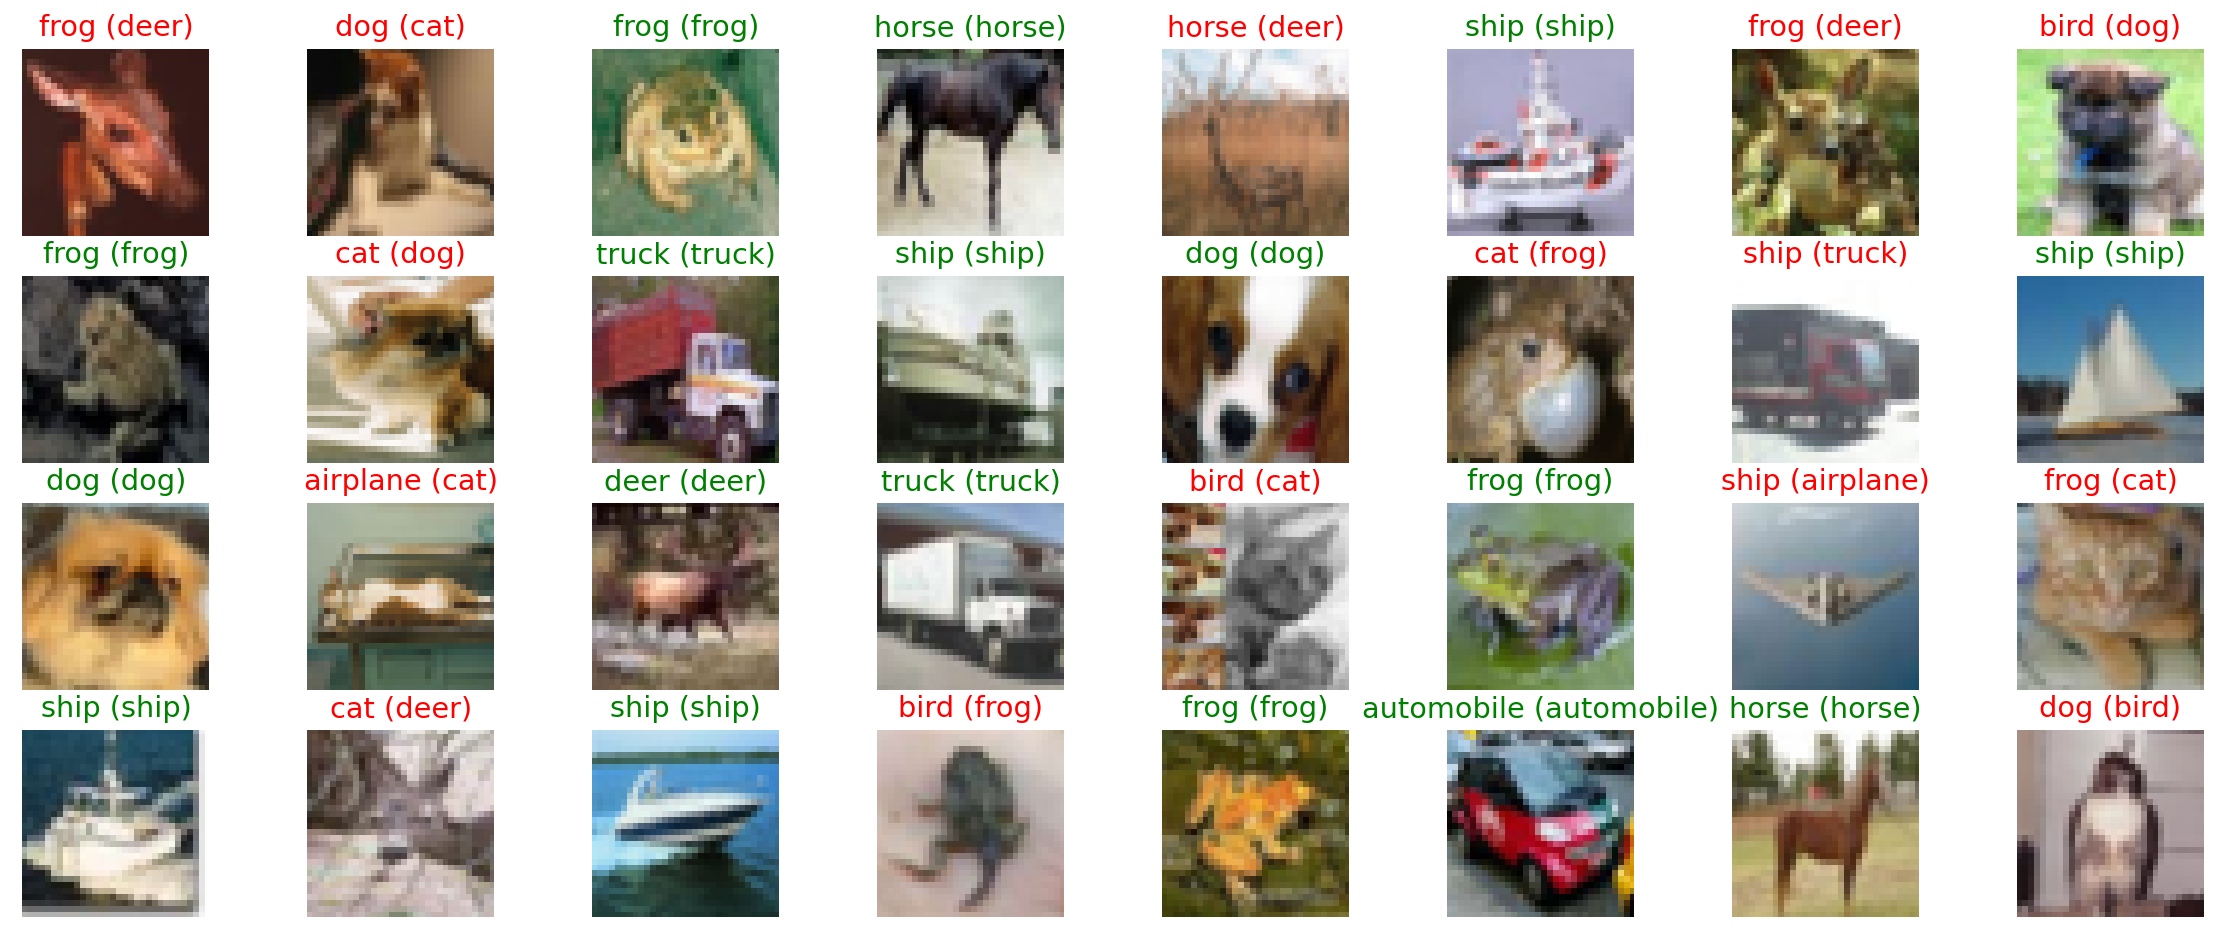

In [ ]:
predict_x = model.predict(x_test)
output = np.argmax(predict_x,axis=1)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# plot a random sample of test images, their predicted labels, and ground truth

print("Green labels are right predictions, red are wrong predictions. The one in the paranthesis is the ground truth(real), \
      the first label is the prediction by the CNN")
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(predict_x[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# tuning 2 lenet

In [ ]:
model = tf.keras.Sequential()

# first set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(64, kernel_size=(5,5),
                        strides=(1,1),
                        padding='same', # adds sufficient padding to the input so that the output has same dimension as input
                        input_shape=input_shape,
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros'))

# Exercise : Complete the 3 activation functions
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))

# second set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3),
                        padding='valid'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(tf.keras.layers.Conv2D(120, kernel_size=(3,3),
                 padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84))

# Classifier
model.add(tf.keras.layers.Dense(num_classes))

# Exercise : Complete the activation function of the classifier
model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
batch_size = 64
num_classes = 10
epochs = 30

model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, # number of samples to be used for each gradient update
                      epochs=epochs, # number of iterations over the entire x_train data#
                      validation_split = 0.1, #validation_data=(x_test, y_test), # on which to evaluate loss and model metrics at the end of each epoch
                     )

#mlp model

In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras
from keras import callbacks
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

2.8.2


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
img_rows, img_cols = 32, 32

In [ ]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

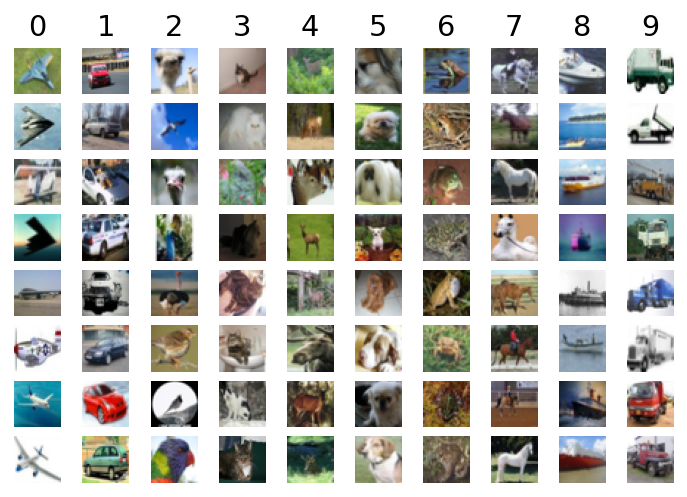

In [ ]:
examples_per_class = 8 # number of examples you want to see from each class
num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for cls, cls_name in enumerate(num_classes):
  idxs = np.where(cls == y_train)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, len(num_classes), i * len(num_classes) + cls + 1)
    plt.imshow(x_train[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name)

In [ ]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, len(num_classes))
y_test = keras.utils.np_utils.to_categorical(y_test, len(num_classes))

In [ ]:
model = keras.Sequential() # declaring that we are using the sequential model in Keras

# Practical Exercise
# input of dim x to hidden layer of x units with relu activation
model.add(keras.layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(keras.layers.Dropout(0.2)) # randomly setting 20% of the units to 0 at each update during training time to prevent overfitting.

# another hidden layer with x units with relu activation
# dropout hyperparameter to be completed
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(len(num_classes), activation='softmax')) # num_classes = 10, softmax transform the weights into probabilities

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(), #'rmsprop'
              metrics=['accuracy'])

In [ ]:
batch_size = 128
#num_classes = 10
epochs = 20
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, # number of samples to be used for each gradient update
                      epochs=epochs, # number of iterations over the entire x_train data
#                       validation_data=(x_test, y_test), # on which to evaluate loss and model metrics at the end of each epoch
                      validation_split = 0.1)

Epoch 1/20
352/352 [==============================] - 3s 5ms/step - loss: 2.1608 - accuracy: 0.2429 - val_loss: 1.8626 - val_accuracy: 0.3228
Epoch 2/20
352/352 [==============================] - 2s 5ms/step - loss: 1.8735 - accuracy: 0.3214 - val_loss: 1.8566 - val_accuracy: 0.3304
Epoch 3/20
352/352 [==============================] - 2s 5ms/step - loss: 1.7961 - accuracy: 0.3522 - val_loss: 1.7803 - val_accuracy: 0.3650
Epoch 4/20
352/352 [==============================] - 2s 5ms/step - loss: 1.7484 - accuracy: 0.3702 - val_loss: 1.6853 - val_accuracy: 0.4024
Epoch 5/20
352/352 [==============================] - 2s 5ms/step - loss: 1.7093 - accuracy: 0.3865 - val_loss: 1.7405 - val_accuracy: 0.3676
Epoch 6/20
352/352 [==============================] - 2s 5ms/step - loss: 1.6830 - accuracy: 0.3939 - val_loss: 1.6448 - val_accuracy: 0.4228
Epoch 7/20
352/352 [==============================] - 2s 5ms/step - loss: 1.6652 - accuracy: 0.4008 - val_loss: 1.5952 - val_accuracy: 0.4238
Epoch 

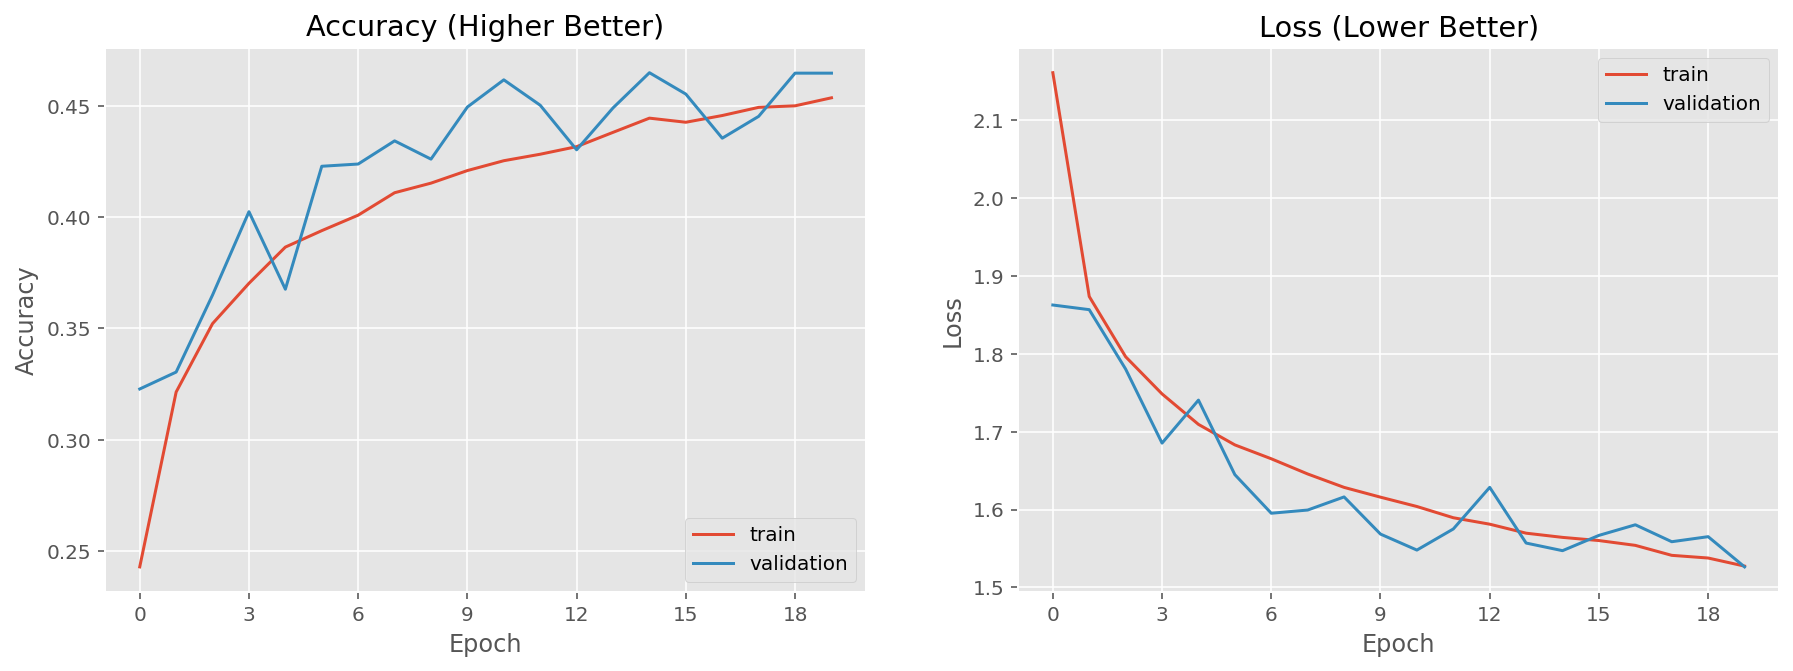

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5220317840576172
Test accuracy: 0.4611000120639801


In [ ]:
predict_x = model.predict(x_test)
output = np.argmax(predict_x,axis=1)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# plot a random sample of test images, their predicted labels, and ground truth

print("Green labels are right predictions, red are wrong predictions. The one in the paranthesis is the ground truth(real), \
      the first label is the prediction by the CNN")
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(predict_x[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# tuning 1 mlp


# file export

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## This function will create the specified folder
import os

def createFolder (path):
  try:
    os.mkdir(path)
  except:
    print("The folder already exists:", path)
  else:
    print("The folder is created:", path)

In [ ]:
trainFolder = '/content/drive/MyDrive/googlecollab/assignment&project/train'

modelVersion = 'modelv2'

modelFolder = '/content/drive/MyDrive/googlecollab/assignment&project/logs' + modelVersion + '/'
createFolder(modelFolder)

labelFile = modelFolder + 'labels.txt'
tfliteFile = modelFolder + 'landmark_model.tflite'
createFolder(modelFolder)

labelFile = modelFolder + 'labels.txt'
tfliteFile = modelFolder + 'landmark_model.tflite'

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgr0m8wsi/assets
